<a href="https://colab.research.google.com/github/GustavoBD-Dev/StatisticalTechniquesAndDataMining/blob/RegressionModels/Regresi%C3%B3nLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo de regresión multiple

Directamente a la correlación ¿porque?

$$y = \beta_0 + \beta_1x_1 +\beta_2x_2 + \dots + \beta_nx_n + \epsilon$$


Al existir muchas variables, se utiliza $\beta$ (o pendiente) para y $x$ para las variables **independientes**.


In [3]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
%cd /content/drive/MyDrive/Colab Notebooks/StatisticModelsAndDataMining/RegressionAndTimeSeries/data

/content/drive/MyDrive/Colab Notebooks/StatisticModelsAndDataMining/RegressionAndTimeSeries/data


In [22]:
%ls

BASE.csv  Calamares.xlsx  ContamH2Opeletera393.xlsx  ejmG_3D.csv  simple_NL.xlsx


Se realizó un experimento para determinar su es posible predecir el peso de un animal después de un periodo determinado con base en el precio inicial y la cantidad de alimento que consumía.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
database = pd.read_csv('ejmG_3D.csv')
database.head()

,KgFinal,KgInicial,kgAlimento
0,95,42,272
1,77,33,226
2,80,33,259
3,100,45,292
4,97,39,311


Donde:
- **KgFinal**: peso del animal. *(Variable dependiente)*
- **KgInicial**: peso del animal antes del experimento. *(variable dependiente)*
- **kgAlimento**: cantidad de alimento. *(variable dependiente)*

In [63]:
database.shape # shape of DatFrame

(10, 3)

In [24]:
import plotly.express as px
fig = px.scatter_3d(database, x='KgInicial', y='kgAlimento', z='KgFinal', color='KgFinal')
fig.show()

¿Hay relación entre las variables explicativas y la variable respuesta?

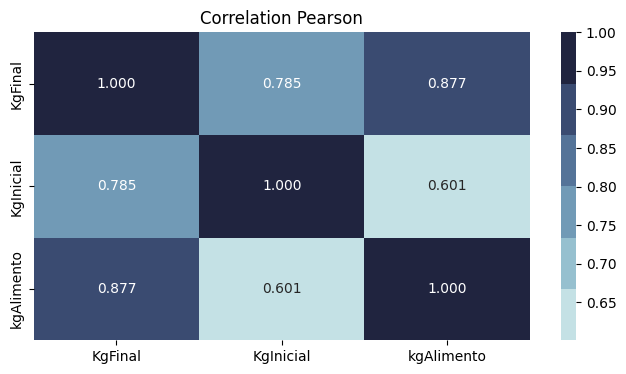

In [66]:
import seaborn as sns
fig = plt.subplots(1, sharex='col', figsize=(8, 4))
labels = list(database.columns)
matrix = pd.DataFrame(database.corr(method='pearson').values, index=labels, columns=labels)
sns.heatmap(matrix, annot=True, fmt='.3f', cmap=sns.cubehelix_palette(rot=-.2)).set_title('Correlation Pearson')
plt.show()

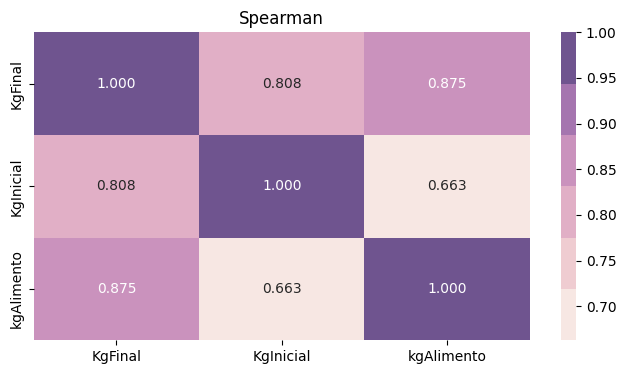

In [68]:
import seaborn as sns
fig = plt.subplots(1, sharex='col', figsize=(8, 4))
labels = list(database.columns)
matrix = pd.DataFrame(database.corr(method='spearman').values, index=labels, columns=labels)
sns.heatmap(matrix, annot=True, fmt='.3f', cmap=sns.cubehelix_palette(gamma=.5)).set_title('Spearman')
plt.show()

In [27]:
0.877 * 0.877

0.769129

Si exisitiera una diferencia entre las correlaciones (pearson - spearman), significa que es lineal. Si existe una diferencia mas alta puede ser una relacion no lineal.

- corr $kginicial = 0.78$ y el porcentaje $r^2 = 0.616$ (61.6% de las y's se explican por la relación con x's) -> la relacion entre kginicial es positiva con intensidad media
- corr kgAlimento = 0.87 el y el porcentaje, R^2=0.769  la relacion entre KgAlimento es positiva y con intensidad fuerte.

Para este ejemplo la ecuación podría ser:
$$ y = \beta_0 + \beta_1 x_1 +\beta_2 x_2 + \epsilon $$

Donde:
- $y$ es el peso final del animal.
- $\beta_0$ es la intersección.
- $\beta_1$ es el coeficiente de variacion de $x_1$ (KgInicial).
- $\beta_2$ es el coeficiente de variacion de $x_2$ (kgalimento).
- $\epsilon$ es el error.



### Estimacion directa

In [43]:
import statsmodels.api as sm

X = pd.DataFrame({'beta0' : np.ones(database.shape[0]),
                  'beta1' : database['KgInicial'],
                  'beta2' : database['kgAlimento']})

y = database['KgFinal']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                KgFinal   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     24.09
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           0.000727
Time:                        05:32:04   Log-Likelihood:                -30.408
No. Observations:                  10   AIC:                             66.82
Df Residuals:                       7   BIC:                             67.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta0        -22.9932     17.763     -1.294      0.2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



In [44]:
# coeficiente de correlacion
r_squared = results.rsquared
r = r_squared ** 0.5
print(f'Coeficiente de correlación R: {r}')

Coeficiente de correlación R: 0.9344292266990262


In [45]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  beta0   -22.993164
beta1     1.395673
beta2     0.217613
dtype: float64
R2:  0.8731579797093401


### Validación

ANOVA de la regresión:

$$ H_0 : \beta_0 = \beta_1 = \beta_2 $$

Estadistico de prueba: $$F = 24.09$$

$$ p-value = 0.000727$$

Recomendación sobre $H_0$ ? se rechaza

* siempre que $p-value <=  \alpha$ se rechaza

si el estadistico de prueba = estadistico contraste, se repite el experimento o se usan pruebas aleatorizadas.


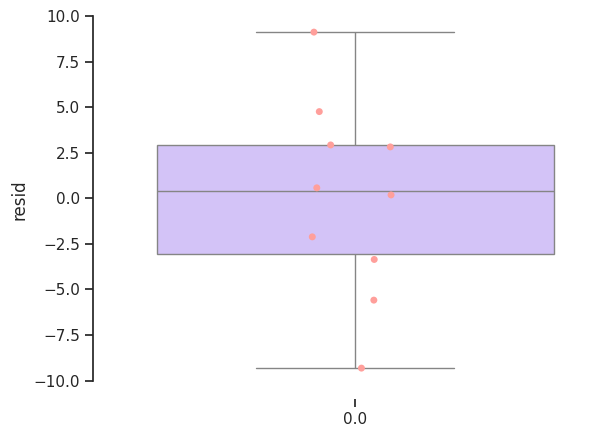

In [96]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = pd.DataFrame(results.resid, columns=['resid'])

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=np.zeros(results.resid.shape[0]), y='resid',
            palette=["m", "g"],
            data=tips)
sns.stripplot(x=np.zeros(results.resid.shape[0]), y='resid',
              palette=["r", "b"], jitter=True,
              data=tips,
              edgecolor="gray")
sns.despine(offset=10, trim=True)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
multicolinealidad = [VIF(X, i) for i in range (X.shape[1]-1)]

vif = pd.DataFrame({'vif':multicolinealidad}, index=X.columns[1:])
vif

,vif
beta1,86.176001
beta2,1.565524


In [55]:
estimados = results.fittedvalues
print(estimados)


0     94.815945
1     72.244672
2     79.425915
3    103.355232
4     99.115849
5     67.074314
6     59.315489
7     85.586190
8     82.884836
9     81.181557
dtype: float64


In [56]:
from scipy import stats
x_c_intercepto = sm.add_constant(X)
x_c_intercepto

,beta0,beta1,beta2
0,1.0,42,272
1,1.0,33,226
2,1.0,33,259
3,1.0,45,292
4,1.0,39,311
5,1.0,36,183
6,1.0,32,173
7,1.0,41,236
8,1.0,40,230
9,1.0,38,235


In [47]:
results.predict()

array([ 94.81594518,  72.24467223,  79.42591465, 103.35523206,
        99.1158493 ,  67.07431448,  59.31548875,  85.58618962,
        82.88483626,  81.18155747])

In [61]:
import numpy as np
import plotly.graph_objects as go

# Create the 3D scatter plot
fig = px.scatter_3d(database, x='KgInicial', y='kgAlimento', z='KgFinal', color='KgFinal')

# Create the regression plane
x_range = np.linspace(database['KgInicial'].min(), database['KgInicial'].max(), 10)
y_range = np.linspace(database['kgAlimento'].min(), database['kgAlimento'].max(), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_grid = results.params[0] + results.params[1] * x_grid + results.params[2] * y_grid

# Add the regression plane to the plot
fig.add_trace(go.Surface(x=x_grid, y=y_grid, z=z_grid, showscale=False, opacity=0.5))

fig.show()


<ipython-input-61-9244015945aa>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

